In [1]:
import pandas as pd
import numpy as np


In [2]:
state = "CA"

if state == "CA":
    filepath = '../data/VM2--CA--2022-04-25/'
if state=='CO':
    filepath = '../data/VM2--CO--2022-04-26/'
if state=='MD':
    filepath = '../data/VM2--MD--2022-04-08/'
if state=='ME':
    filepath = '../data/VM2--ME--2022-03-02/'
if state=='MN':
    filepath = '../data/VM2--MN--2022-03-25/'
if state=='NM':
    filepath = '../data/VM2--NM--2022-03-30/'
if state == "UT":
    filepath = '../data/VM2--UT--2022-03-30/'
if state=='VT':
    filepath = '../data/VM2--VT--2022-04-20/'
    
voter_turnout_merge = pd.read_csv(f'{filepath}voter_turnout_merged_{state}.csv')
voter_turnout_merge.head()

,Residence_Addresses_City,elec_date,elec_year,elec_type,total_voters_asian,total_voters_black,total_voters_hispanic,total_voters_others,total_voters_white,voted_voters_asian,...,CommercialData_EstimatedHHIncomeAmount,total_voters_college,total_voters_no_college,voted_voters_college,voted_voters_no_college,perc_turnout_college,perc_turnout_no_college,mean_age,voter_population,voted_voters
0,Oakland,2020_11_03,2020,General,30600.0,61476.0,37174.0,8628.0,83122.0,23041.0,...,115534.731762,80668.0,27989.0,71356.0,22543.0,88.456389,80.542356,47.829424,331652,172221.0
1,Oakland,2018_11_06,2018,General,30600.0,61476.0,37174.0,8628.0,83122.0,14972.0,...,115534.731762,80668.0,27989.0,59248.0,17372.0,73.446720,62.067241,48.224196,331652,130249.0
2,Oakland,2016_11_08,2016,General,30600.0,61476.0,37174.0,8628.0,83122.0,16057.0,...,115534.731762,80668.0,27989.0,60766.0,18951.0,75.328507,67.708743,46.819512,331652,135633.0
3,Oakland,2014_11_04,2014,General,30600.0,61476.0,37174.0,8628.0,83122.0,8145.0,...,115534.731762,80668.0,27989.0,38216.0,10811.0,47.374424,38.625889,51.034918,331652,75153.0
4,Oakland,2021_11_02,2021,Consolidated_General,30600.0,61476.0,37174.0,8628.0,83122.0,1.0,...,115534.731762,80668.0,27989.0,2.0,1.0,0.002479,0.003573,55.732444,331652,7.0


In [3]:
# perc_turnout_asian and other races are calculated per election date, election type and city level
# we want to aggregate at election type level and city level, so remove the those columns
voter_turnout_merge_race = voter_turnout_merge[[col for col in voter_turnout_merge.columns \
                                                if "elec_type" in col or\
                                                "voters_asian" in col or\
                                                "voters_black" in col or\
                                                "voters_hispanic" in col or\
                                                "voters_white" in col or\
                                                "voters_others" in col or\
                                                "perc_turnout_asian"  in col or\
                                                "perc_turnout_black"  in col or\
                                                "perc_turnout_hispanic"  in col or\
                                                "perc_turnout_white"  in col or\
                                                "perc_turnout_others"  in col 
                                               ]]

voter_turnout_merge_race.head()

,elec_type,total_voters_asian,total_voters_black,total_voters_hispanic,total_voters_others,total_voters_white,voted_voters_asian,voted_voters_black,voted_voters_hispanic,voted_voters_others,voted_voters_white,perc_turnout_asian,perc_turnout_black,perc_turnout_hispanic,perc_turnout_others,perc_turnout_white
0,General,30600.0,61476.0,37174.0,8628.0,83122.0,23041.0,45891.0,26954.0,6346.0,69989.0,75.297386,74.648643,72.507667,73.551229,84.200332
1,General,30600.0,61476.0,37174.0,8628.0,83122.0,14972.0,35012.0,17857.0,4536.0,57872.0,48.928105,56.952307,48.036262,52.573018,69.622964
2,General,30600.0,61476.0,37174.0,8628.0,83122.0,16057.0,37256.0,19792.0,4560.0,57968.0,52.473856,60.602512,53.241513,52.851182,69.738457
3,General,30600.0,61476.0,37174.0,8628.0,83122.0,8145.0,21265.0,8235.0,2097.0,35411.0,26.617647,34.590735,22.152580,24.304590,42.601237
4,Consolidated_General,30600.0,61476.0,37174.0,8628.0,83122.0,1.0,1.0,1.0,0.0,4.0,0.003268,0.001627,0.002690,0.000000,0.004812


### Average turnout for white, black, Hispanic, and Asian voters in local, consolidated, and general elections
-    Grouped bar graph by election type


In [4]:
elec_turnout_per_race = voter_turnout_merge_race[[col for col in voter_turnout_merge.columns \
                                                    if "elec_type" in col or\
                                                    "perc_turnout_asian"  in col or\
                                                    "perc_turnout_black"  in col or\
                                                    "perc_turnout_hispanic"  in col or\
                                                    "perc_turnout_white"  in col or\
                                                    "perc_turnout_others"  in col ]].groupby('elec_type').mean().reset_index()
elec_turnout_per_race

,elec_type,perc_turnout_asian,perc_turnout_black,perc_turnout_hispanic,perc_turnout_others,perc_turnout_white
0,Consolidated_General,1.153434,0.891985,0.823824,1.064587,1.652569
1,General,47.973849,53.762609,49.259568,49.937054,62.123949
2,Local_or_Municipal,0.191057,0.185434,0.133525,0.128158,0.203542


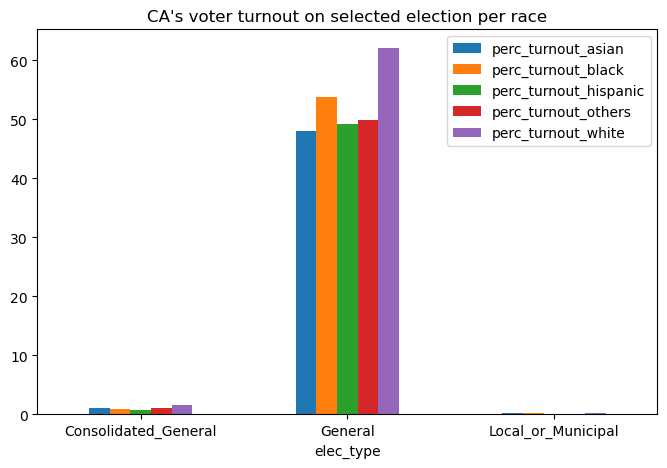

In [5]:
fig = elec_turnout_per_race.plot(x='elec_type',
                                 kind='bar',
                                 stacked=False,
                                 title=f'{state}\'s voter turnout on selected election per race',
                                 figsize=(8, 5), 
                                 rot=0).get_figure()

fig.savefig(f'{filepath}elec_turnout_per_race.jpg')

### Average gap in turnout between white and non-white voters in local, consolidated, and general elections
-    Bar graph by election type

In [6]:
# sum up total_voters and voted_voters for all races except for white
non_white_cols = [col for col in voter_turnout_merge_race if "elec_type" not in col and "voters_white" not in col]

for v in ['total_voters_', 'voted_voters_']:
    voter_turnout_merge_race[v+'non_white'] = voter_turnout_merge_race[[col for col in non_white_cols if v in col ]].sum(axis =1)

voter_turnout_merge_race['perc_turnout_non_white'] =  voter_turnout_merge_race['voted_voters_non_white']/voter_turnout_merge_race['total_voters_non_white']*100

## find the gap of voter's turnout for each record (city, election type and election date levels)
voter_turnout_merge_race['gap_white_non_white'] = voter_turnout_merge_race['perc_turnout_white']  - voter_turnout_merge_race['perc_turnout_non_white']  
                                                   
#voter_turnout_merge_race['voted_voters_white']/voter_turnout_merge_race['total_voters_white'] - voter_turnout_merge_race['voted_voters_non_white']/voter_turnout_merge_race['total_voters_non_white'])*100
voter_turnout_merge_race.head(10)

/var/folders/ww/21cvzb4164325blmx95x6cd80000gn/T/ipykernel_4816/2593976927.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voter_turnout_merge_race[v+'non_white'] = voter_turnout_merge_race[[col for col in non_white_cols if v in col ]].sum(axis =1)
/var/folders/ww/21cvzb4164325blmx95x6cd80000gn/T/ipykernel_4816/2593976927.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voter_turnout_merge_race[v+'non_white'] = voter_turnout_merge_race[[col for col in non_white_cols if v in col ]].sum(axis =1)
/var/f

,elec_type,total_voters_asian,total_voters_black,total_voters_hispanic,total_voters_others,total_voters_white,voted_voters_asian,voted_voters_black,voted_voters_hispanic,voted_voters_others,voted_voters_white,perc_turnout_asian,perc_turnout_black,perc_turnout_hispanic,perc_turnout_others,perc_turnout_white,total_voters_non_white,voted_voters_non_white,perc_turnout_non_white,gap_white_non_white
0,General,30600.0,61476.0,37174.0,8628.0,83122.0,23041.0,45891.0,26954.0,6346.0,69989.0,75.297386,74.648643,72.507667,73.551229,84.200332,137878.0,102232.0,74.146709,10.053623
1,General,30600.0,61476.0,37174.0,8628.0,83122.0,14972.0,35012.0,17857.0,4536.0,57872.0,48.928105,56.952307,48.036262,52.573018,69.622964,137878.0,72377.0,52.493509,17.129455
2,General,30600.0,61476.0,37174.0,8628.0,83122.0,16057.0,37256.0,19792.0,4560.0,57968.0,52.473856,60.602512,53.241513,52.851182,69.738457,137878.0,77665.0,56.328783,13.409673
3,General,30600.0,61476.0,37174.0,8628.0,83122.0,8145.0,21265.0,8235.0,2097.0,35411.0,26.617647,34.590735,22.152580,24.304590,42.601237,137878.0,39742.0,28.824033,13.777204
4,Consolidated_General,30600.0,61476.0,37174.0,8628.0,83122.0,1.0,1.0,1.0,0.0,4.0,0.003268,0.001627,0.002690,0.000000,0.004812,137878.0,3.0,0.002176,0.002636
5,Local_or_Municipal,30600.0,61476.0,37174.0,8628.0,83122.0,55.0,54.0,22.0,15.0,353.0,0.179739,0.087839,0.059181,0.173853,0.424677,137878.0,146.0,0.105891,0.318786
6,Local_or_Municipal,30600.0,61476.0,37174.0,8628.0,83122.0,2.0,0.0,0.0,0.0,1.0,0.006536,0.000000,0.000000,0.000000,0.001203,137878.0,2.0,0.001451,-0.000248
7,Consolidated_General,30600.0,61476.0,37174.0,8628.0,83122.0,320.0,325.0,211.0,110.0,1353.0,1.045752,0.528662,0.567601,1.274919,1.627728,137878.0,966.0,0.700619,0.927109
8,General,12705.0,5596.0,16028.0,2429.0,17780.0,9229.0,4299.0,11984.0,1729.0,14638.0,72.640693,76.822731,74.769154,71.181556,82.328459,36758.0,27241.0,74.109037,8.219421
9,General,12705.0,5596.0,16028.0,2429.0,17780.0,5006.0,3045.0,7351.0,998.0,11221.0,39.401810,54.413867,45.863489,41.086867,63.110236,36758.0,16400.0,44.616138,18.494098


In [7]:
## take the average per election type
elec_turnout_per_whiteOrNot = voter_turnout_merge_race[['elec_type', 'gap_white_non_white']].groupby('elec_type').mean().reset_index()
print(elec_turnout_per_whiteOrNot)

              elec_type  gap_white_non_white
0  Consolidated_General             0.735943
1               General            13.260730
2    Local_or_Municipal             0.064473


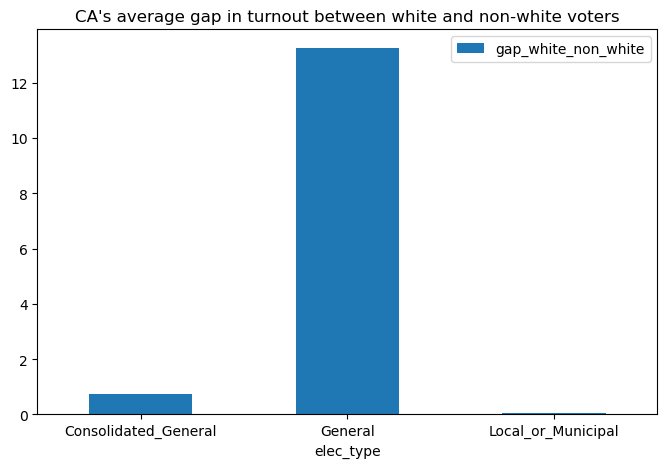

In [8]:
fig = elec_turnout_per_whiteOrNot.plot(x='elec_type',
                                       kind='bar',
                                       stacked=False,
                                       title=f'{state}\'s average gap in turnout between white and non-white voters',
                                       figsize=(8, 5),
                                       rot=0).get_figure()

fig.savefig(f'{filepath}elec_turnout_per_whiteOrNot.jpg')